Importing the necessary python libraries

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Gold Stock data and cleaning it:

In [433]:
gold_stock_data = pd.read_csv('stock_gold.csv')
# gold_stock_data.head()
# gold_stock_data.columns # All columns don't have extra spaces
# gold_stock_data.info()  # Year is of type int and others are of type object
gold_stock_data['Year'] = pd.to_datetime(gold_stock_data['Year'], format='%Y').dt.year
cols = gold_stock_data.columns[1:]  # slicing to get columns except Year
for i in cols:
    gold_stock_data[i] = gold_stock_data[i].str.replace(',', '').astype(float)
# gold_stock_data.info()

# Loading this into data frame
stock_gold_df = pd.DataFrame(gold_stock_data)
# Taking data only after year 2015
stock_gold_df = stock_gold_df[stock_gold_df['Year'] >= 2015]
stock_gold_df.head()

,Year,Jewellery,Central banks,Private Investment,Bars & Coins,ETFs,Other,Total
5,2015,89409.4,31839.3,37242.9,35655.0,1587.9,25453.8,183945.4
6,2016,90196.1,32234.1,38859.1,36728.1,2131.0,26208.9,187498.2
7,2017,91341.1,32612.7,40174.1,37772.4,2401.7,26920.5,191048.4
8,2018,92499.5,33268.9,41335.0,38863.0,2472.0,27589.3,194692.7
9,2019,93375.9,33874.3,42609.7,39734.1,2875.6,28435.4,198295.2


Now loading the data of Dow, SPX and Silver

In [434]:
# Dow Jones:
dow_data = pd.read_csv('dow_jones.csv')
# dow_data.columns    # Empty spaces in column names
dow_data.columns = dow_data.columns.str.strip()
# dow_data.columns
# dow_data.info() # Date column is dtype object
dow_data['Date'] = pd.to_datetime(dow_data['Date'], format='mixed')
dow_data.set_index('Date', inplace=True)
dow_data = dow_data.resample('YE').last()   # resampling to year end data only
dow_data.reset_index(inplace=True)
dow_data['Date'] = dow_data['Date'].dt.year
dow_data = dow_data.rename(columns={'Date': 'Year'})
# Assigning the data into Data Frame
dow_df = pd.DataFrame(dow_data)
dow_df['Index'] = 'Dow_Jones'
dow_df['Percent Change'] = dow_df['Close'].pct_change()*100
dow_df['Percent Change'] = dow_df['Percent Change'].fillna(0)
dow_df.head()

,Year,Open,High,Low,Close,Index,Percent Change
0,2015,17590.66,17590.66,17421.16,17425.03,Dow_Jones,0.000000
1,2016,19833.17,19852.55,19718.67,19762.60,Dow_Jones,13.415013
2,2017,24849.63,24871.66,24719.22,24719.22,Dow_Jones,25.080809
3,2018,23153.94,23333.18,23118.30,23327.46,Dow_Jones,-5.630275
4,2019,28414.64,28547.35,28376.49,28538.44,Dow_Jones,22.338394


In [435]:
# S&P 500:
snp_data = pd.read_csv('spx.csv')
# snp_data.columns    # Again extra spaces in column names
snp_data.columns = snp_data.columns.str.strip()
# snp_data.info() # Date is of type object again
snp_data['Date'] = pd.to_datetime(snp_data['Date'], format='mixed')
snp_data.set_index('Date', inplace=True)
snp_data = snp_data.resample('YE').last()   # Resampling data to end of year data only
snp_data.reset_index(inplace=True)
snp_data['Date'] = snp_data['Date'].dt.year
snp_data = snp_data.rename(columns={'Date': 'Year'})
# Assigning the data into Data Frame
snp_df = pd.DataFrame(snp_data)
snp_df['Index'] = 'S&P_500'
snp_df['Percent Change'] = snp_df['Close'].pct_change()*100
snp_df['Percent Change'] = snp_df['Percent Change'].fillna(0)
snp_df.head()

,Year,Open,High,Low,Close,Index,Percent Change
0,2015,2060.59,2062.54,2043.62,2043.94,S&P_500,0.000000
1,2016,2251.61,2253.58,2233.62,2238.83,S&P_500,9.535016
2,2017,2689.15,2692.12,2673.61,2673.61,S&P_500,19.419965
3,2018,2498.94,2509.24,2482.82,2506.85,S&P_500,-6.237260
4,2019,3215.18,3231.72,3212.03,3230.78,S&P_500,28.878074


In [436]:
# Gold Prices:
gold_price_data = pd.read_csv('gold_prices.csv')
# gold_price_data.columns # Column names are ok here just Close/Last => Close
# gold_price_data.info()  # Date is of type object here
gold_price_data['Date'] = pd.to_datetime(gold_price_data['Date'], format='mixed')
gold_price_data.set_index('Date', inplace=True)
gold_price_data = gold_price_data.resample('YE').last()
gold_price_data.reset_index(inplace=True)
gold_price_data['Date'] = gold_price_data['Date'].dt.year
gold_price_data = gold_price_data.rename(columns={'Close/Last': 'Close'})
gold_price_data = gold_price_data[gold_price_data['Date'] >= 2015]
gold_price_data = gold_price_data.rename(columns={'Date': 'Year'})
# Assigning data into Data Frame
price_gold_df = pd.DataFrame(gold_price_data)
price_gold_df['Index'] = 'Gold'
price_gold_df['Percent Change'] = price_gold_df['Close'].pct_change()*100
price_gold_df['Percent Change'] = price_gold_df['Percent Change'].fillna(0)
price_gold_df.head()

,Year,Close,Volume,Open,High,Low,Index,Percent Change
1,2015,1060.2,53272.0,1060.6,1062.7,1056.5,Gold,0.000000
2,2016,1151.7,138673.0,1159.5,1164.3,1150.3,Gold,8.630447
3,2017,1309.3,226714.0,1297.5,1309.8,1296.1,Gold,13.684119
4,2018,1281.3,108913.0,1283.0,1286.5,1279.7,Gold,-2.138547
5,2019,1519.5,301.0,1513.8,1523.4,1513.8,Gold,18.590494


In [437]:
# Silver Prices:
silver_price_data = pd.read_csv('silver_prices.csv')
# silver_price_data.columns   #Just change the column name Close/Last to Close
silver_price_data = silver_price_data.rename(columns={'Close/Last': 'Close'})
# silver_price_data.info()    # Date is of type object here
silver_price_data['Date'] = pd.to_datetime(silver_price_data['Date'], format='mixed')
silver_price_data.set_index('Date', inplace=True)
silver_price_data = silver_price_data.resample('YE').last()
silver_price_data.reset_index(inplace=True)
silver_price_data = silver_price_data[silver_price_data['Date'].dt.year >= 2015]
silver_price_data['Date'] = silver_price_data['Date'].dt.year
silver_price_data = silver_price_data.rename(columns={'Date': 'Year'})
# Assigning data into the Data Frame
price_silver_df = pd.DataFrame(silver_price_data)
price_silver_df['Index'] = 'Silver'
price_silver_df['Percent Change'] = price_silver_df['Close'].pct_change()*100
price_silver_df['Percent Change'] = price_silver_df['Percent Change'].fillna(0)
price_silver_df.head()

,Year,Close,Volume,Open,High,Low,Index,Percent Change
1,2015,13.803,16809.0,13.865,13.960,13.765,Silver,0.000000
2,2016,15.989,43311.0,16.225,16.345,15.880,Silver,15.837137
3,2017,17.145,69874.0,16.905,17.175,16.865,Silver,7.229971
4,2018,15.540,49552.0,15.460,15.575,15.390,Silver,-9.361330
5,2019,17.828,232.0,18.065,18.065,17.800,Silver,14.723295


Now combining the Prices Data Frames to plot the graph

In [438]:
combined_df = pd.concat([dow_df, snp_df, price_silver_df, price_gold_df])
combined_df.drop('Volume', axis=1, inplace=True)    # Dropping Volume as it is giving NaN values
combined_df.head()

,Year,Open,High,Low,Close,Index,Percent Change
0,2015,17590.66,17590.66,17421.16,17425.03,Dow_Jones,0.000000
1,2016,19833.17,19852.55,19718.67,19762.60,Dow_Jones,13.415013
2,2017,24849.63,24871.66,24719.22,24719.22,Dow_Jones,25.080809
3,2018,23153.94,23333.18,23118.30,23327.46,Dow_Jones,-5.630275
4,2019,28414.64,28547.35,28376.49,28538.44,Dow_Jones,22.338394


Plotting the graph

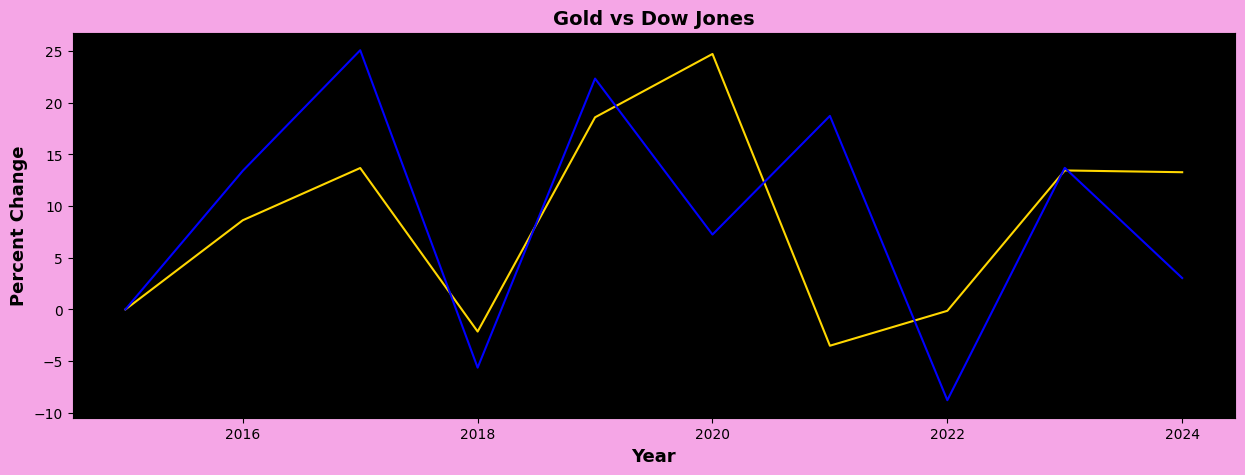

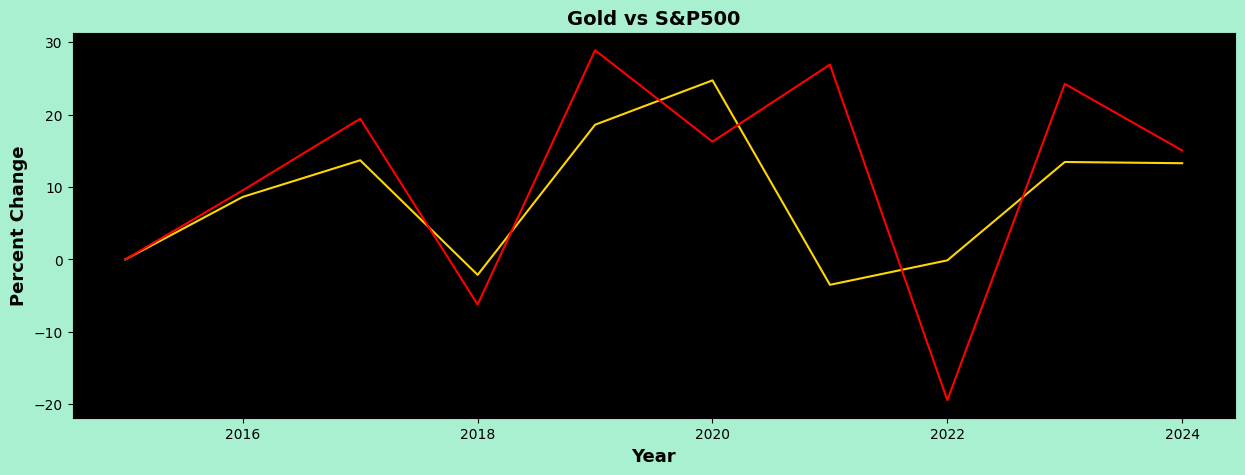

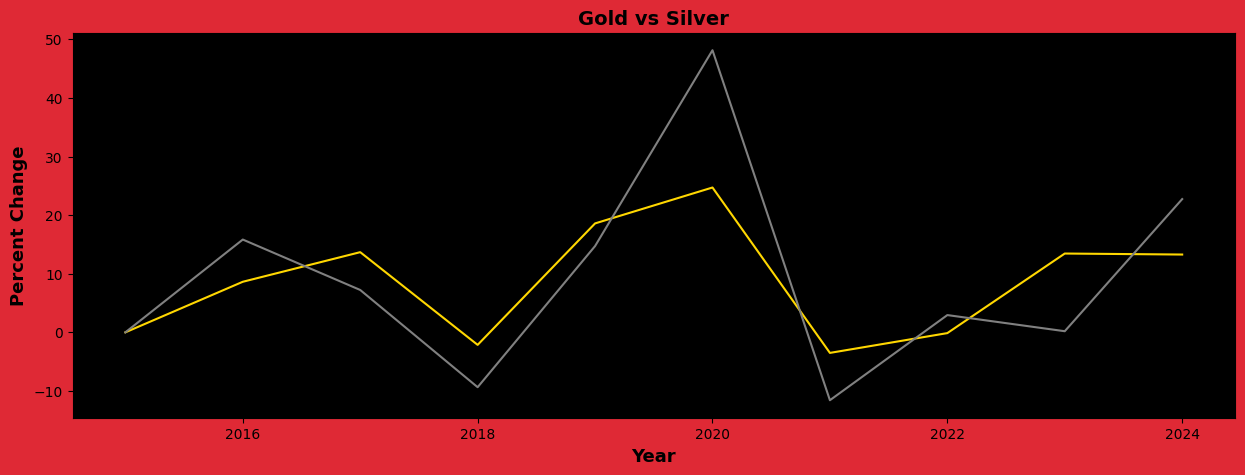

In [439]:
plt.figure(figsize=(15,5), facecolor='#F5A6E6')
plt.axes().set_facecolor('#000000')
sns.lineplot(data=price_gold_df, y='Percent Change', x='Year', color='gold')
sns.lineplot(data=dow_df, x='Year', y='Percent Change', color='blue')
plt.title('Gold vs Dow Jones', fontweight = 'bold', fontsize = '14')
plt.xlabel('Year', fontweight = 'bold', fontsize = 13)
plt.ylabel('Percent Change', fontweight = 'bold', fontsize = 13)
plt.show()

plt.figure(figsize=(15,5), facecolor='#A9F0D1')
plt.axes().set_facecolor('#000000')
sns.lineplot(data=price_gold_df, y='Percent Change', x='Year', color='gold')
sns.lineplot(data=snp_df, x='Year', y='Percent Change', color='red')
plt.title('Gold vs S&P500', fontweight = 'bold', fontsize = '14')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Percent Change', fontweight = 'bold', fontsize = '13')
plt.show()

plt.figure(figsize=(15,5), facecolor='#DF2935')
plt.axes().set_facecolor('#000000')
sns.lineplot(data=price_gold_df, y='Percent Change', x='Year', color='gold')
sns.lineplot(data=price_silver_df, x='Year', y='Percent Change', color='grey')
plt.title('Gold vs Silver', fontweight = 'bold', fontsize = '14')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Percent Change', fontweight = 'bold', fontsize = '13')
plt.show()

Plotting a Pie Chart of Gold stock in various instruments like ETF, gold bar/coins etc.

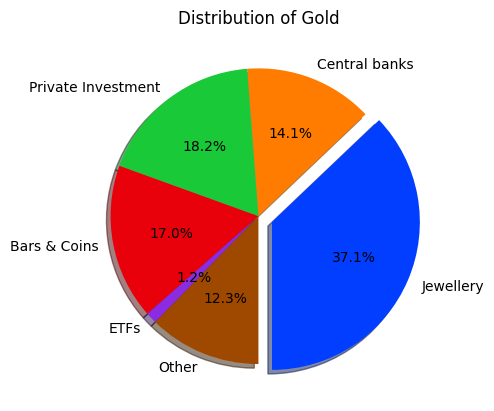

In [440]:
pie_data = stock_gold_df[stock_gold_df['Year'] == 2023]
labels = pie_data.columns[1:-1]
pie_data = pie_data.iloc[0]
sns.set_palette('bright')
explode = [0.1 if label == 'Jewellery' else 0 for label in labels]
plt.title("Distribution of Gold")
plt.pie(pie_data[labels], labels=labels, autopct='%0.1f%%', explode=explode, shadow=True, startangle=-90)
plt.show()

Now analysisng the Market Cap of gold Year by Year:
    
    Market Cap of gold = Gold present above the ground * Market rate of gold

In [441]:
stock_gold_df['Total ounces'] = stock_gold_df['Total'] * 32150.7    # tonnes to ounces
market_cap_df = stock_gold_df.merge(price_gold_df, on='Year')
market_cap_df['Market Cap'] = (market_cap_df['Total ounces'] * market_cap_df['Close']) / 1e12
market_cap_df.head()

,Year,Jewellery,Central banks,Private Investment,Bars & Coins,ETFs,Other,Total,Total ounces,Close,Volume,Open,High,Low,Index,Percent Change,Market Cap
0,2015,89409.4,31839.3,37242.9,35655.0,1587.9,25453.8,183945.4,5.913973e+09,1060.2,53272.0,1060.6,1062.7,1056.5,Gold,0.000000,6.269995
1,2016,90196.1,32234.1,38859.1,36728.1,2131.0,26208.9,187498.2,6.028198e+09,1151.7,138673.0,1159.5,1164.3,1150.3,Gold,8.630447,6.942676
2,2017,91341.1,32612.7,40174.1,37772.4,2401.7,26920.5,191048.4,6.142340e+09,1309.3,226714.0,1297.5,1309.8,1296.1,Gold,13.684119,8.042165
3,2018,92499.5,33268.9,41335.0,38863.0,2472.0,27589.3,194692.7,6.259507e+09,1281.3,108913.0,1283.0,1286.5,1279.7,Gold,-2.138547,8.020306
4,2019,93375.9,33874.3,42609.7,39734.1,2875.6,28435.4,198295.2,6.375329e+09,1519.5,301.0,1513.8,1523.4,1513.8,Gold,18.590494,9.687313


Plotting the Market Cap data

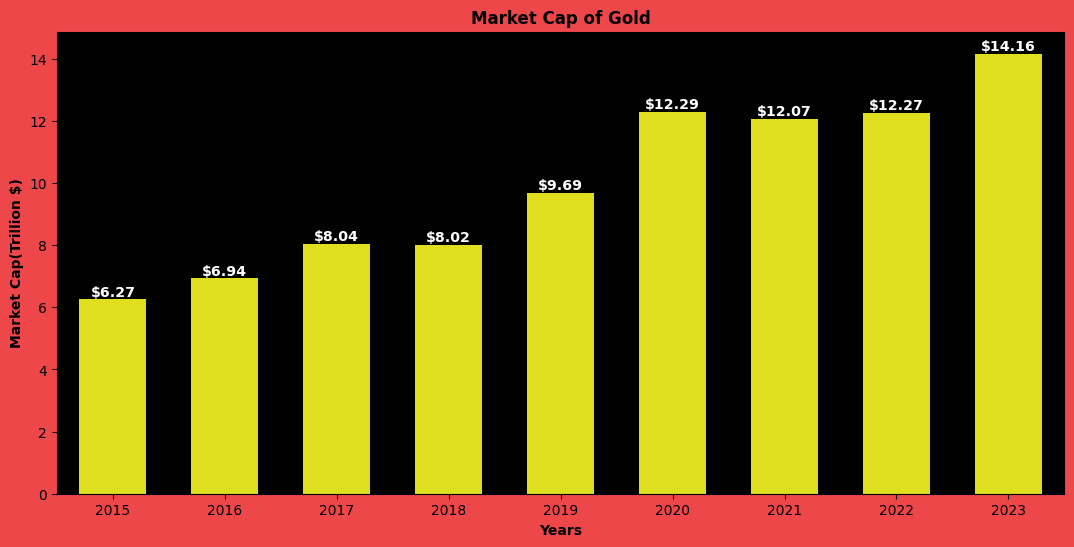

In [442]:
plt.figure(figsize=(13,6), facecolor='#ED474A')
plt.axes().set_facecolor('#000000')
sns.set_palette('bright')
barplot = sns.barplot(data=market_cap_df, x='Year', y='Market Cap', color='yellow', width=0.6)
for container in barplot.containers:
    barplot.bar_label(container, fmt='$%.2f', fontweight='bold', fontsize=10.2, color='#ffffff')
plt.title('Market Cap of Gold', fontweight='bold', fontsize=12)
plt.xlabel('Years', fontweight = 'bold')
plt.ylabel('Market Cap(Trillion $)', fontweight = 'bold')
plt.show()

Working on Standard Deviations

In [443]:
# Changing the name as Index is also index level and column label
combined_df = combined_df.rename(columns={'Index': 'Indices'})
# Identifying the first row of each index type by cummulative count and then removing/filtering them out
combined_df['isFirst'] = combined_df.groupby('Indices').cumcount() == 0
combined_df = combined_df[~combined_df['isFirst']].drop(columns='isFirst')
combined_df.head()

,Year,Open,High,Low,Close,Indices,Percent Change
1,2016,19833.17,19852.55,19718.67,19762.60,Dow_Jones,13.415013
2,2017,24849.63,24871.66,24719.22,24719.22,Dow_Jones,25.080809
3,2018,23153.94,23333.18,23118.30,23327.46,Dow_Jones,-5.630275
4,2019,28414.64,28547.35,28376.49,28538.44,Dow_Jones,22.338394
5,2020,30417.64,30637.47,30344.50,30606.48,Dow_Jones,7.246507


In [444]:
# Calculating the Standard Deviations
std_dev = combined_df.groupby('Indices')['Percent Change'].std().reset_index()
std_dev.head()

,Indices,Percent Change
0,Dow_Jones,11.907038
1,Gold,9.744869
2,S&P_500,16.051432
3,Silver,18.263618


Now plotting the graph for standard deviations

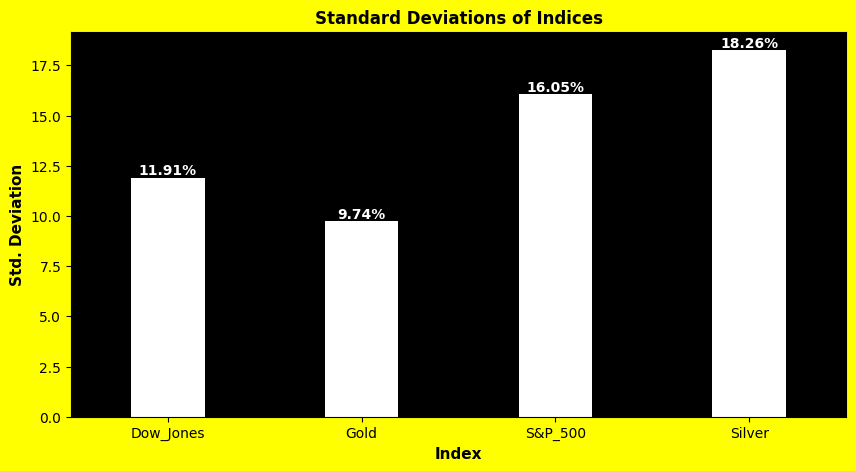

In [445]:
plt.figure(figsize=(10,5), facecolor='yellow')
plt.axes().set_facecolor('#000000')
sns.set_palette('bright')
barplot = sns.barplot(data=std_dev, x='Indices', y='Percent Change', width=0.38, color='#ffffff')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%0.2f%%', color='#ffffff', fontweight='bold')
plt.title('Standard Deviations of Indices', fontweight='bold', fontsize=12)
plt.xlabel('Index', fontweight='bold', fontsize=11)
plt.ylabel('Std. Deviation', fontweight='bold', fontsize=11)
plt.show()

Data Sources:

Gold Stock data: https://www.gold.org/goldhub/data/how-much-gold

Gold price data: https://www.nasdaq.com/market-activity/commodities/gc:cmx/historical

Silver price data: https://www.nasdaq.com/market-activity/commodities/si:cmx

Dow jones data: https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices

S&P500 data: https://www.wsj.com/market-data/quotes/index/US/S&P%20US/SPX